In [31]:
import pandas as pd
import matplotlib.pyplot as plt


from functions import main_cleaning

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"

df_sa = pd.read_excel(url)


In [32]:
df_sa.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
valid_species = {
    'Tiger shark', 'White shark', 'Bull shark', 'Hammerhead shark', 'Great white shark', 
    'Mako shark', 'Blacktip shark', 'Reef shark', 'Nurse shark', 'Whale shark', 'Tiger shark'
}

df_sa = main_cleaning(df_sa, valid_species)


e:\Iván\Documentos\Clase\Informatica\Beca IronHack\Temario\PROYECTOS\project-2-shark-attacks-ironhack\functions.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(value=np.nan, inplace=True)


In [34]:
df_sa.head()

,year,date,type,country,state,location,activity,name,sex,age,injury,fatal,time,species,source,pdf,href_formula,href,case_number,case_number.1
3,2024,25 Feb-2024,Unprovoked,Australia,Western Australia,Sandlnd Island Jurian Bay,NaN,Female,F,46.0,Leg Bitten,No,11:30,Tiger shark,Wa Today 2/26/2024,Unknown,NaN,NaN,NaN,NaN
4,2024,14 Feb-2024,Unprovoked,India,Maharashtra,Vaitarna River Palghar District,Fishing,Vicky Suresh Govari,M,32.0,Calf Of Lower Left Leg Injured,No,12:00,Bull shark,Times Of India 2/14/2024,Unknown,NaN,NaN,NaN,NaN
6,2024,29 Jan-2024,Unprovoked,Australia,New South Wales,Elizabeth Bay Sydney Harbor,Swimming,Lauren O'Neill,F,29.0,Right Leg Bitten,No,20:00,Bull shark,Nine News 12/31/2024,Unknown,NaN,NaN,NaN,NaN
7,2024,15 Jan-2024,Unprovoked,Bahamas,Paradise Island,Paradise Island Resort,Swimming,Male,M,10.0,Right Leg Injured,No,16:00,Unknown,Caribbean Loop News 1/152024,Unknown,NaN,NaN,NaN,NaN
8,2024,09-Jan-2024,Unprovoked,Australia,South Australia,Walkers Beach Elliston,Surfing,Murray Adams,M,64.0,Leg Bitten,No,13:00,White shark,A Currie Gsaf,Unknown,NaN,NaN,NaN,NaN


In [35]:
df_sa = df_sa[df_sa["sex"] != "Lli"]
pivot_table = df_sa.pivot_table(index=["sex", "fatal"], columns="country", aggfunc="count")
pivot_table = pivot_table.fillna(0)
pivot_table

activity                                            \
country     Admiralty Islands American Samoa Andaman / Nicobar Islandas   
sex fatal                                                                 
F   No                    0.0            0.0                        0.0   
    Unknown               0.0            0.0                        0.0   
    Yes                   0.0            0.0                        0.0   
M   No                    0.0            0.0                        0.0   
    Unknown               0.0            0.0                        0.0   
    Yes                   0.0            3.0                        1.0   

                                                                              \
country     Argentina Aruba Atlantic Ocean Australia Azores Bahamas Barbados   
sex fatal                                                                      
F   No            0.0   0.0            1.0      53.0    0.0    15.0      0.0   
    Unknown       0.0   0.0            0.0       0.0    0.0     0.0      0.0   
    Yes           0.0   0.0            0.0      15.0    0.0     4.0      0.0   
M   No            1.0   0.0            1.0     491.0    1.0    56.0      1.0   
    Unknown       0.0   0.0            0.0       2.0    0.0     0.0      0.0   
    Yes           0.0   1.0            2.0     185.0    0.0     3.0      1.0   

                                                                    \
country     Belize Bermuda Brazil British Isles British New Guinea   
sex fatal                                                            
F   No         1.0     1.0    4.0           0.0                0.0   
    Unknown    0.0     0.0    0.0           0.0                0.0   
    Yes        0.0     0.0    1.0           0.0                0.0   
M   No         1.0     4.0   41.0           1.0                1.0   
    Unknown    0.0     0.0    0.0           0.0                0.0   
    Yes        1.0     0.0   16.0           0.0                0.0   

                                                                 \
country     British West Indies Canada Cape Verde Caribbean Sea   
sex fatal                                                         
F   No                      0.0    1.0        0.0           0.0   
    Unknown                 0.0    0.0        0.0           0.0   
    Yes                     0.0    0.0        0.0           0.0   
M   No                      1.0    1.0        0.0           1.0   
    Unknown                 0.0    0.0        0.0           0.0   
    Yes                     0.0    0.0        1.0           0.0   

                                                                              \
country     Central Pacific Ceylon (Sri Lanka) Chile China Colombia Columbia   
sex fatal                                                                      
F   No                  0.0                0.0   1.0   1.0      0.0      0.0   
    Unknown             0.0                0.0   0.0   0.0      0.0      0.0   
    Yes                 0.0                0.0   0.0   0.0      0.0      0.0   
M   No                  1.0                0.0   0.0   2.0      1.0      5.0   
    Unknown             0.0                0.0   0.0   0.0      0.0      0.0   
    Yes                 0.0                1.0   0.0   0.0      0.0      1.0   

                                                                            \
country     Costa Rica Croatia Cuba Cyprus Diego Garcia Dominican Republic   
sex fatal                                                                    
F   No             0.0     0.0  1.0    0.0          0.0                0.0   
    Unknown        0.0     0.0  0.0    0.0          0.0                0.0   
    Yes            1.0     3.0  0.0    0.0          0.0                0.0   
M   No             3.0     1.0  9.0    0.0          0.0                1.0   
    Unknown        0.0     0.0  0.0    0.0          0.0                1.0   
    Yes            2.0     3.0  7.0    1.0  

C:\Users\Iván\AppData\Local\Temp\ipykernel_57128\1777941018.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


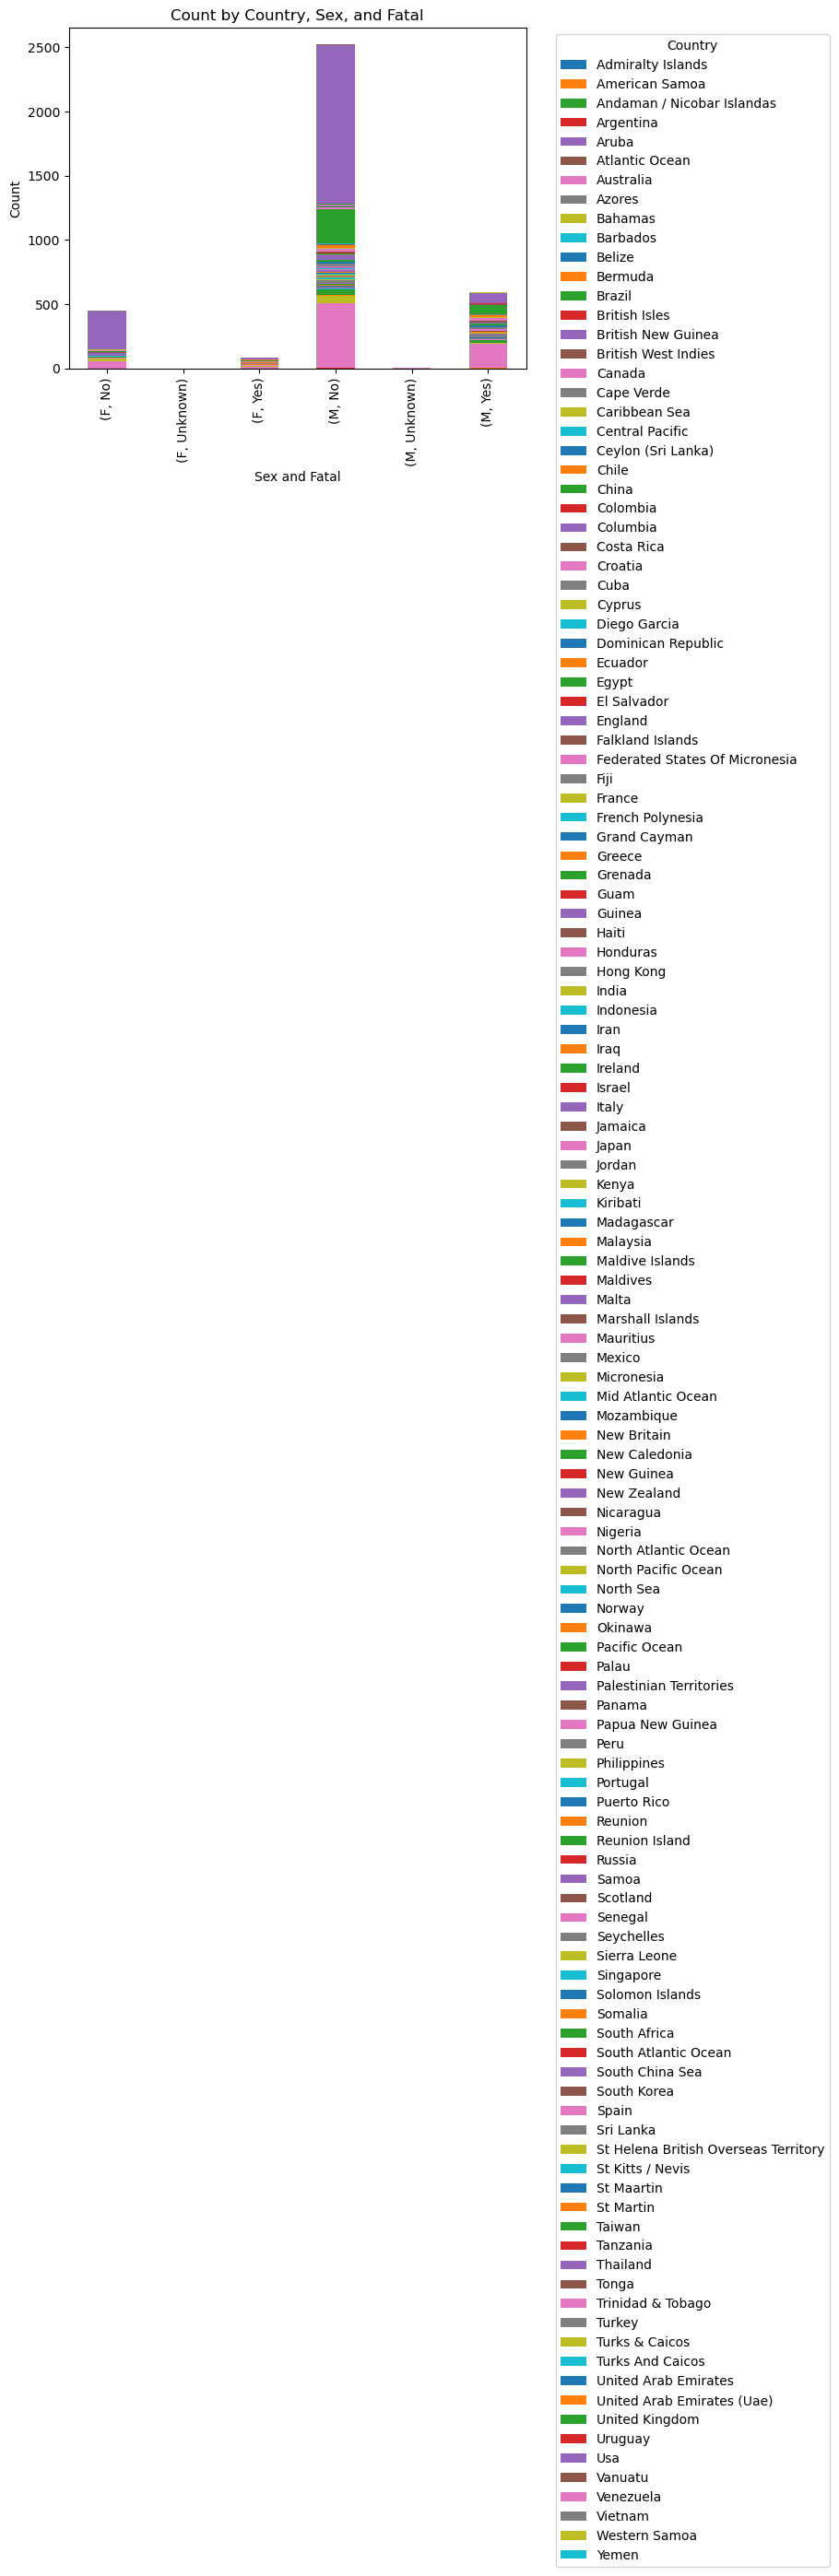

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pivot_table ya está creado
pivot_table = df_sa.pivot_table(index=["sex", "fatal"], columns="country", aggfunc="size", fill_value=0)

# Convertir el pivot_table a un DataFrame plano para facilitar la gráfica
flat_df = pivot_table.reset_index()

# Crear el gráfico de barras apiladas
flat_df.set_index(['sex', 'fatal']).plot(kind='bar', stacked=True, ylabel='Count')

# Ajustar el gráfico
plt.title('Count by Country, Sex, and Fatal')
plt.xlabel('Sex and Fatal')
plt.ylabel('Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()
